In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from scipy.io import loadmat

# plot old log file on server 53, can not run on server 44

**load all datafile**

In [22]:
env = ["pusher", "reacher", "halfcheetah"]
algo = ["PETS", "POPLINA_INIT", "POPLINA_REPLAN", "POPLINP_BC", "POPLINP_AVG"] 

all_file_list = glob.glob(os.path.join(os.getcwd(),'log/*/*/logs.mat'))
print(len(all_file_list))

1


**Eaxmple plot with one algo and one env**

Concatenate all random seeds, and concert to DataFrame
 (3, 50) 
            0           1           2           3           4           5   \
0 -167.971610 -159.240237 -219.614834 -213.779293 -181.962452 -172.442095   
1 -164.980789 -191.979808 -180.852294 -133.175099 -128.802440 -174.875443   
2 -183.249846 -352.231994 -148.763291 -130.717456 -146.644812 -136.313813   

           6           7           8           9   ...          40  \
0 -113.722766 -139.858375 -130.680886 -129.246161  ...  -99.260255   
1 -121.191207 -114.156978 -154.233417 -145.193985  ... -187.720754   
2 -160.239154 -113.195947 -126.943302  -97.843803  ...  -70.706623   

           41          42          43         44         45         46  \
0  -93.791558  -93.955026  -98.860928 -88.760802 -90.034155 -92.888979   
1 -103.252770 -141.509719  -93.804785 -95.796350 -58.266635 -89.696173   
2  -99.086193  -69.418435 -131.796291 -62.804593 -64.287832 -70.054782   

          47          48          49  
0 -89.96

Text(0.5, 1.0, 'POPLINA_INIT_pusher')

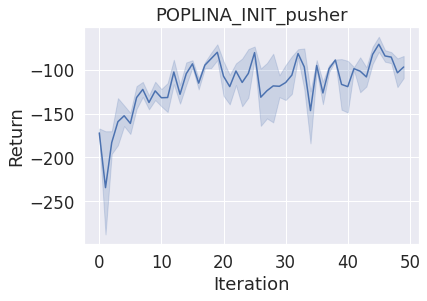

In [59]:
sns.set(style="darkgrid", font_scale=1.5)

file_list = [name for name in all_file_list if "pusher" in name]
file_list = [name for name in file_list if "POPLINA_INIT" in name]
# print(env[j], algo[i], len(file_list))

# loading all random seeds results
data = []
for name in file_list:
    returns = loadmat(name)['returns']
    data.append(returns)

# concat along first dim, convert to DF 
data = np.concatenate(data,axis=0)
data = pd.DataFrame(data) 
print("Concatenate all random seeds, and concert to DataFrame\n", data.shape, "\n",data) # (3, 50)
data = data.melt(var_name="Iteration", value_name="Return") # (150,2)
print("Using melt unpivoit column to row \n", data.shape, "\n", data)

# plot
sns.lineplot(x="Iteration", y="Return", data=data, ci=68)
plt.title("POPLINA_INIT_pusher")

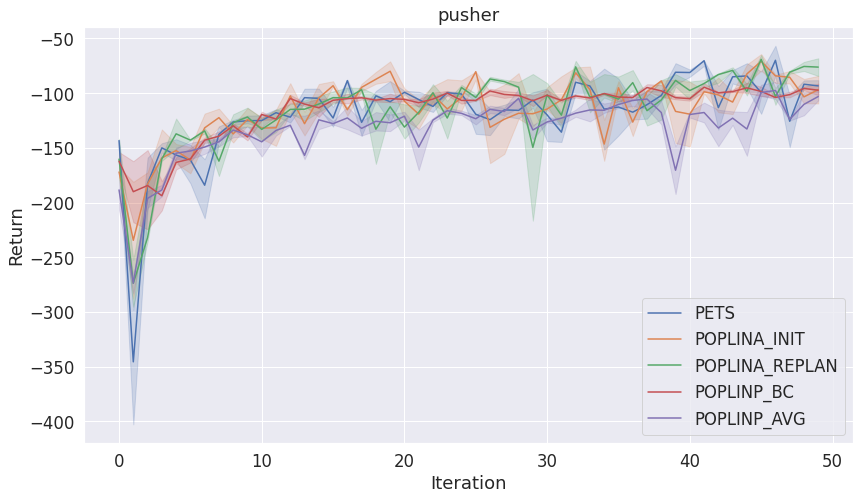

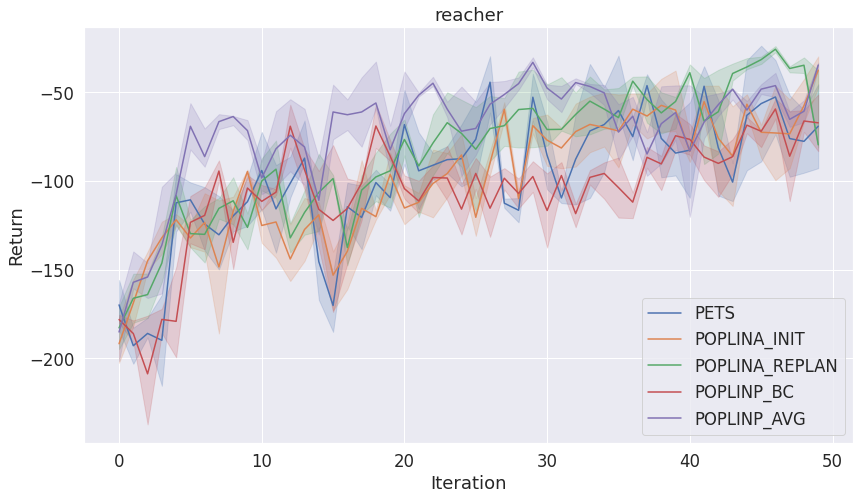

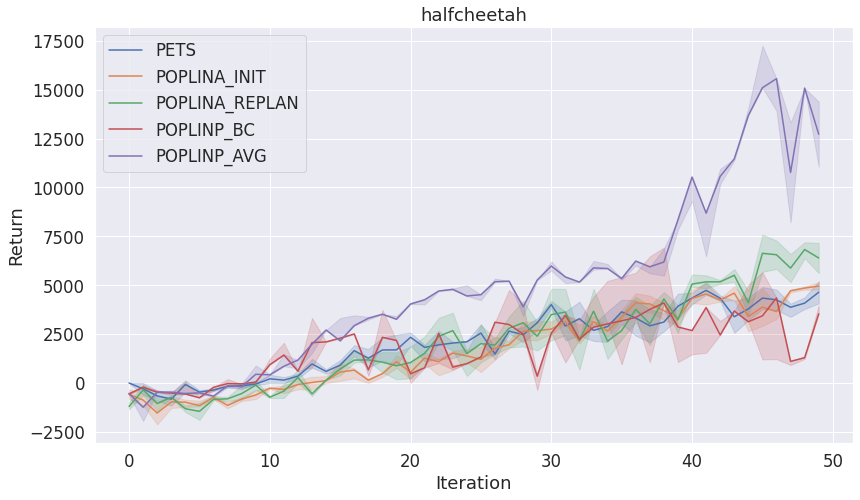

In [63]:
sns.set(style="darkgrid", font_scale=1.5)

for j in range(len(env)):
    fig = plt.figure(figsize=(12,7))
    for i in range(len(algo)):
        file_list = [name for name in all_file_list if env[j] in name]
        file_list = [name for name in file_list if algo[i] in name]
        data = []
        # print(env[j], algo[i], len(file_list))
        for name in file_list:
            returns = loadmat(name)['returns']
            data.append(returns)
        data = np.concatenate(data,axis=0)
        data = pd.DataFrame(data).melt()
        sns.lineplot(x="variable", y="value", data=data, label=algo[i],ci=50)
    plt.title(env[j])
    plt.legend(loc='best')
    plt.tight_layout(pad=0.5)
    plt.xlabel("Iteration")
    plt.ylabel("Return")
    plt.show()

# plot log on server 44

## horizon experiments on Cheetah-v0
load all experiments .mat

file_path = log/horizon_exp/POPLINP_AVG_Cheetah/hxxx/datexxx/logs.mat

In [14]:
all_file_list = glob.glob(os.path.join(os.getcwd(),'log/horizon_exp/POPLINP_AVG_Cheetah/*/*/logs.mat'))
# 5 horizon * 3 random seeds = 15 experiments
print(len(all_file_list))

18


example plot with one horizon length

Concatenate all random seeds, and concert to DataFrame
 (3, 200) 
            0            1            2           3            4    \
0  -396.236791 -2578.872926  -317.410279 -201.820152  -982.751136   
1 -1122.006208  -315.228038  -235.880645 -489.611967 -1594.573109   
2  -744.925991  -773.084468 -2381.583832 -238.718081 -2938.098091   

           5           6           7           8           9    ...  \
0  -605.165808 -810.919494 -491.038689 -447.332799 -421.798967  ...   
1  -537.056555 -669.343948 -532.775892 -367.231613 -188.434817  ...   
2 -1027.247133 -632.434925 -784.693730  226.077653 -145.910940  ...   

           190          191          192          193          194  \
0  2101.987566  2094.464062  2112.076225  2143.907748  2115.693254   
1  2092.712289  2061.546898  2097.659444  2166.770436  2129.042925   
2  2072.261619  2096.250213  2176.250827  2061.569622  2073.645245   

           195          196          197          198          199  
0  2105.632019  2099.

Text(0.5, 1.0, 'POPLINP_AVG_Cheetah')

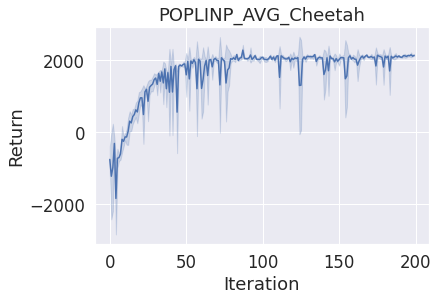

In [3]:
sns.set(style="darkgrid", font_scale=1.5)

file_list = [name for name in all_file_list if "h10" in name]

data = []
for name in file_list:
    returns = loadmat(name)['returns']
    data.append(returns)
    
# concat along first dim, convert to DF 
data = np.concatenate(data,axis=0)
data = pd.DataFrame(data) 
print("Concatenate all random seeds, and concert to DataFrame\n", data.shape, "\n",data) # (3, 200)

data = data.melt(var_name="Iteration", value_name="Return") # (600,2)
print("Using melt unpivoit column to row \n", data.shape, "\n", data)

# plot
sns.lineplot(x="Iteration", y="Return", data=data, ci='sd')
plt.title("POPLINP_AVG_Cheetah")

different horizon in one plot

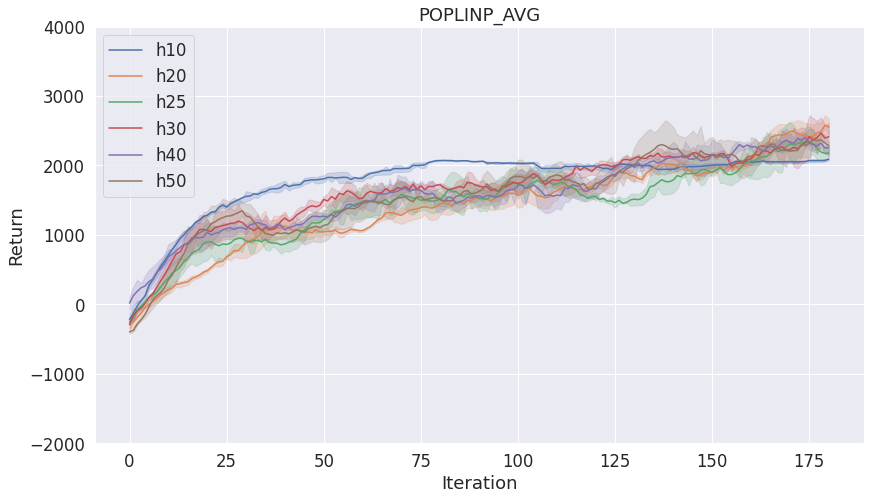

In [19]:
sns.set(style="darkgrid", font_scale=1.5)
horizon = ['h10', 'h20', 'h25','h30', 'h40', 'h50']
last_val = []

fig = plt.figure(figsize=(12,7))
for i in range(len(horizon)):
    file_list = [name for name in all_file_list if horizon[i] in name]
    data = []
    for name in file_list:
        returns = loadmat(name)['returns']
        data.append(returns)
    data = np.concatenate(data,axis=0)
    # data = data[:,::25]
    ############################running average##########################
    data = pd.DataFrame(data)
    N = 20
    data = data.rolling(window=N, axis=1).mean().iloc[:,N-1:].values
    last_val.append(data[:, -1])
    data = pd.DataFrame(data)
    #####################################################################
    data = pd.DataFrame(data).melt()
    sns.lineplot(x="variable", y="value", data=data, label=horizon[i], ci=50)
plt.title('POPLINP_AVG')
plt.legend(loc='best')
plt.tight_layout(pad=0.5)
plt.xlabel("Iteration")
plt.ylabel("Return")
plt.ylim(-2000, 4000)
plt.savefig('planning_horizon.png')
plt.show()

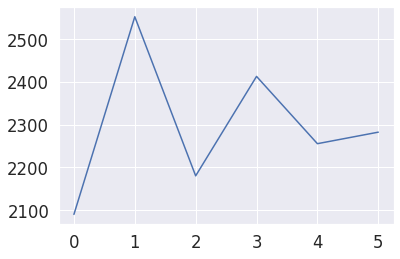

In [17]:
last_val_mean = [np.mean(val) for val in last_val]
# plt.plot(np.arange(1,6,1) * 10, last_val_mean)
plt.plot(last_val_mean)

different horizon in 5 plot

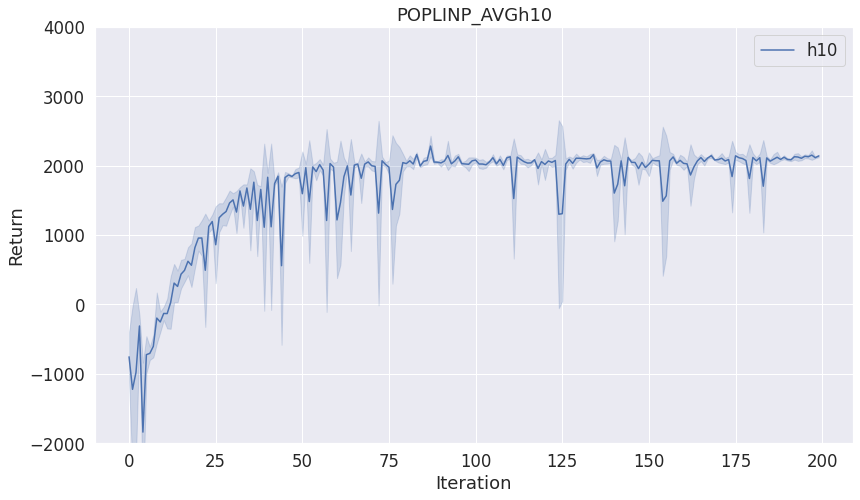

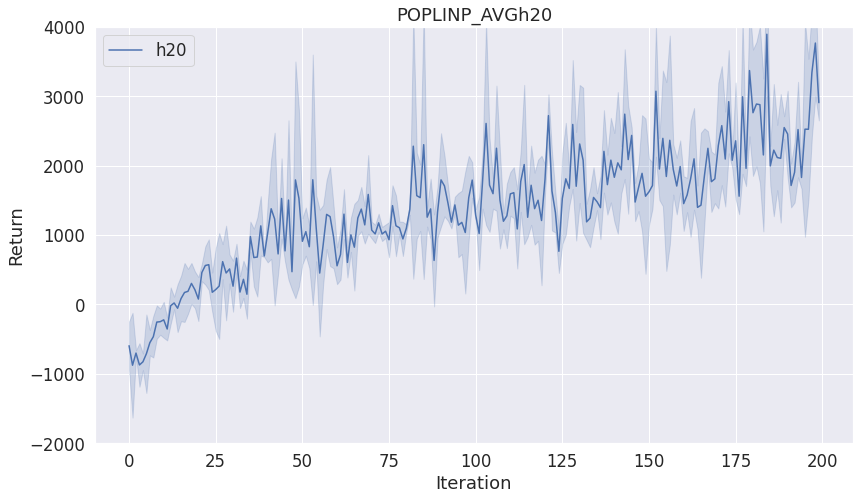

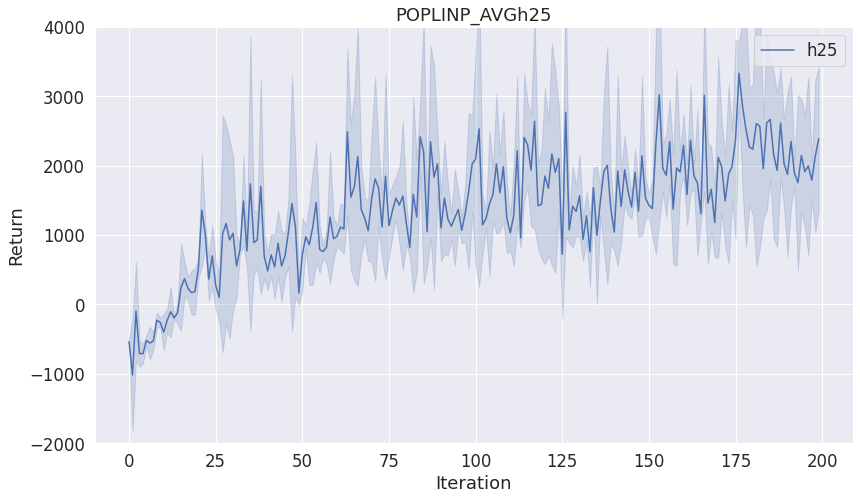

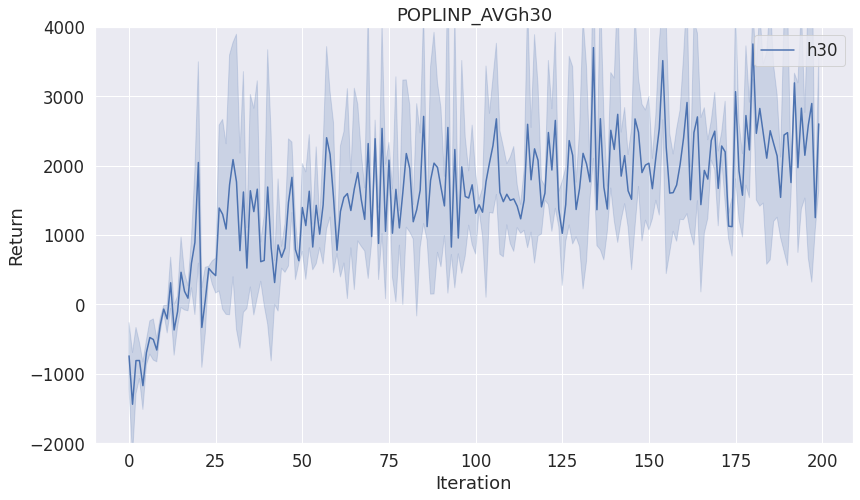

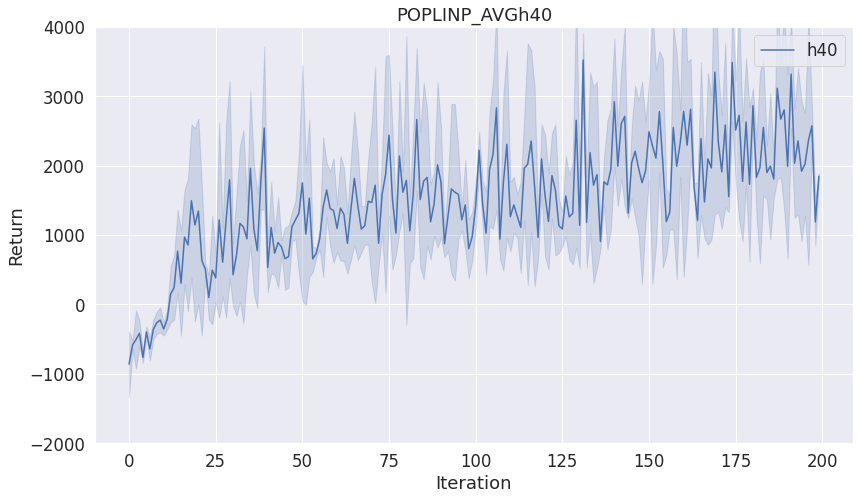

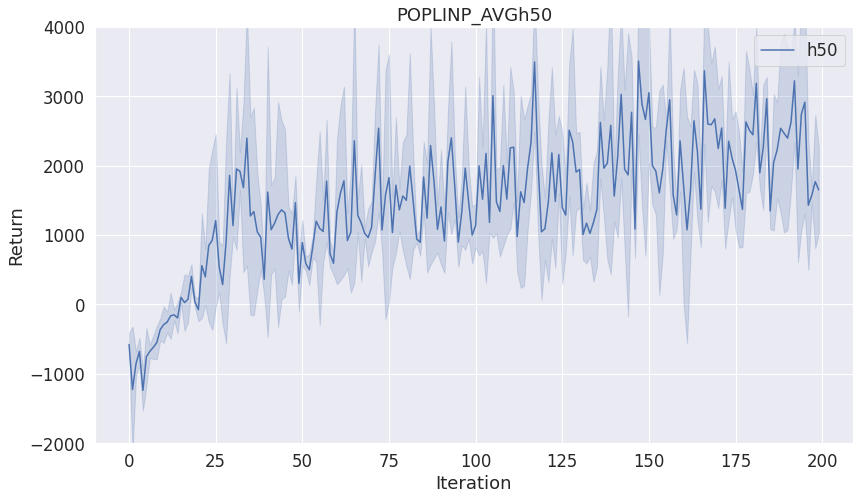

In [18]:
sns.set(style="darkgrid", font_scale=1.5)
horizon = ['h10', 'h20', 'h25', 'h30', 'h40', 'h50']


for i in range(len(horizon)):
    fig = plt.figure(figsize=(12,7))
    file_list = [name for name in all_file_list if horizon[i] in name]
    data = []
    for name in file_list:
        returns = loadmat(name)['returns']
        data.append(returns)
    data = np.concatenate(data,axis=0)
#     data = pd.DataFrame(data)
#     N = 5
#     data = data.rolling(window=N, axis=1).mean().iloc[:,N-1:].values
#     last_val.append(data[:, -1])
#     data = pd.DataFrame(data)
    data = pd.DataFrame(data).melt()
    sns.lineplot(x="variable", y="value", data=data, label=horizon[i],ci='sd')
    plt.title('POPLINP_AVG' + horizon[i])
    plt.legend(loc='best')
    plt.tight_layout(pad=0.5)
    plt.xlabel("Iteration")
    plt.ylabel("Return")
    plt.ylim(-2000, 4000)
    plt.show()

smooth data for clearness

In [2]:
sns.set(style="darkgrid", font_scale=1.5)

file_list = [name for name in all_file_list if "h50" in name]

data = []
for name in file_list:
    returns = loadmat(name)['returns']
    data.append(returns)
    
# concat along first dim, convert to DF 
data = np.concatenate(data,axis=0)
data = pd.DataFrame(data) 
print("Concatenate all random seeds, and concert to DataFrame\n", data.shape, "\n",data,"\n\n") # (3, 200)



N = 5
data = data.rolling(window=N, axis=1).mean().iloc[:,N-1:].values
print("Running avg with window %d\n"%N, data.shape, "\n") # (3, 200)

data = pd.DataFrame(data)
data = data.melt(var_name="Iteration", value_name="Return") # (600,2)
print("Using melt unpivoit column to row \n", data.shape, "\n", data)

# plot
fig = plt.figure(figsize=(12,7))
sns.lineplot(x="Iteration", y="Return", data=data, ci='sd')
plt.title("POPLINP_AVG_Cheetah")
plt.legend(loc='best')
plt.tight_layout(pad=0.5)
plt.xlabel("Iteration")
plt.ylabel("Return")
plt.ylim(-2000, 4000)

NameError: name 'all_file_list' is not defined

## Poplulation Size on Cheetah-v0 with 50 horizon
different popsize on cheetah-v0, but with 50 horizon

to justify the perfromance degrade is not due to insufficent popsize

In [2]:
all_file_list = glob.glob(os.path.join(os.getcwd(),'log/popsize_exp/POPLINP_AVG_Cheetah/*/*/logs.mat'))
# 5 horizon * 3 random seeds = 15 experiments
print(len(all_file_list))

16


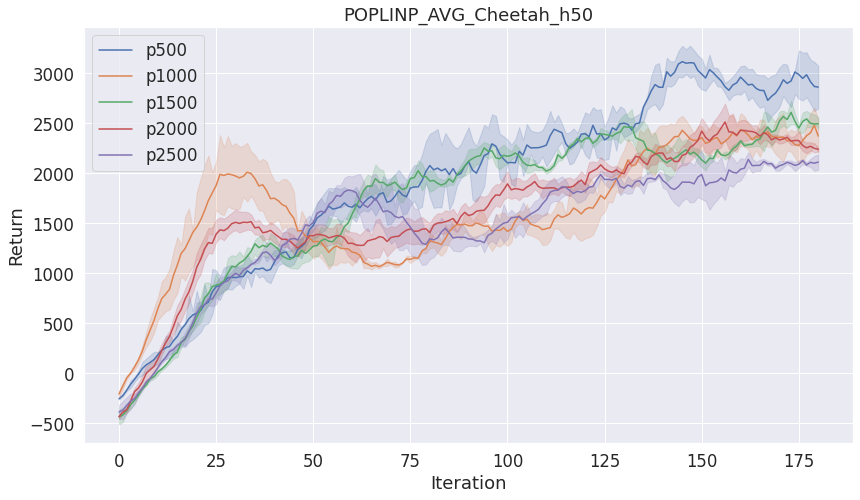

In [3]:
sns.set(style="darkgrid", font_scale=1.5)
horizon = ['p500', 'p1000', 'p1500','p2000','p2500']
last_val = []

fig = plt.figure(figsize=(12,7))
for i in range(len(horizon)):
    file_list = [name for name in all_file_list if horizon[i] in name]
    data = []
    for name in file_list:
        returns = loadmat(name)['returns']
        data.append(returns)
    data = np.concatenate(data,axis=0)
    # data = data[:, :70]
    # data = data[:,::25]
    ############################running average##########################
    data = pd.DataFrame(data)
    N = 20
    data = data.rolling(window=N, axis=1).mean().iloc[:,N-1:].values
    last_val.append(data[:, -1])
    data = pd.DataFrame(data)
    #####################################################################
    data = pd.DataFrame(data).melt()
    sns.lineplot(x="variable", y="value", data=data, label=horizon[i], ci=50)
plt.title('POPLINP_AVG_Cheetah_h50')
plt.legend(loc='best')
plt.tight_layout(pad=0.5)
plt.xlabel("Iteration")
plt.ylabel("Return")
# plt.ylim(-2000, 6000)
plt.savefig('pop_size.png')
plt.show()

## Poplulation Size with horizon 30 on halfcheetah
different popsize on halfcheetah with 30 horizon

to reproduce the paper's exp

In [4]:
all_file_list = glob.glob(os.path.join(os.getcwd(),'log/popsize_exp_halfcheetah/*/*/logs.mat'))
# 5 horizon * 3 random seeds = 15 experiments
print(len(all_file_list))

12


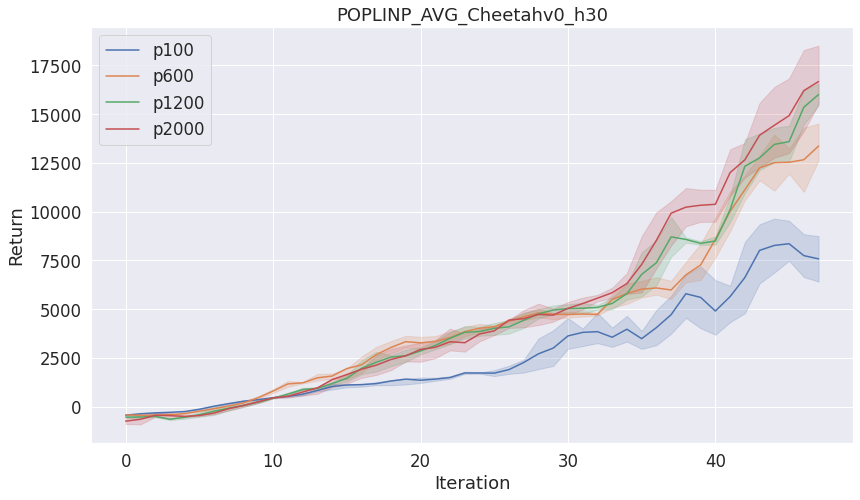

In [5]:
sns.set(style="darkgrid", font_scale=1.5)
horizon = ['p100', 'p600', 'p1200','p2000']
last_val = []

fig = plt.figure(figsize=(12,7))
for i in range(len(horizon)):
    file_list = [name for name in all_file_list if horizon[i] in name]
    data = []
    for name in file_list:
        returns = loadmat(name)['returns']
        data.append(returns)
    data = np.concatenate(data,axis=0)
    ############################running average##########################
    data = pd.DataFrame(data)
    N = 3
    data = data.rolling(window=N, axis=1).mean().iloc[:,N-1:].values
    last_val.append(data[:, -1])
    data = pd.DataFrame(data)
    #####################################################################
    data = pd.DataFrame(data).melt()
    sns.lineplot(x="variable", y="value", data=data, label=horizon[i], ci=50)
plt.title('POPLINP_AVG_Cheetahv0_h30')
plt.legend(loc='best')
plt.tight_layout(pad=0.5)
plt.xlabel("Iteration")
plt.ylabel("Return")
# plt.ylim(0, 14000)
plt.show()

## Horizon exp on halfcheetah
different horizon on halfcheetah with 500 popsize



In [4]:
all_file_list = glob.glob(os.path.join(os.getcwd(),'log/horizon_exp/POPLINP_AVG_HalfCheetah/*/*/logs.mat'))
# 5 horizon * 3 random seeds = 15 experiments
print(len(all_file_list))

15


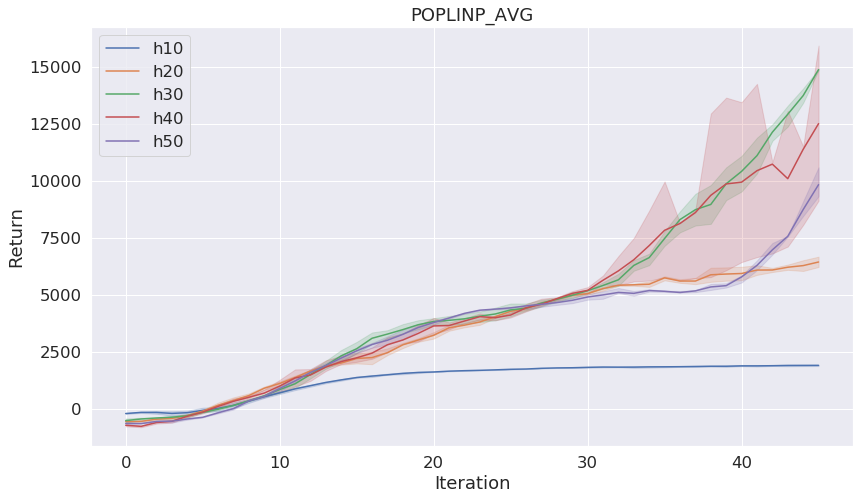

In [15]:
sns.set(style="darkgrid", font_scale=1.5)
horizon = ['h10', 'h20', 'h30', 'h40', 'h50']
last_val = []

fig = plt.figure(figsize=(12,7))
for i in range(len(horizon)):
    file_list = [name for name in all_file_list if horizon[i] in name]
    data = []
    for name in file_list:
        returns = loadmat(name)['returns']
        data.append(returns)
    data = np.concatenate(data,axis=0)
    ############################running average##########################
    data = pd.DataFrame(data)
    N = 5
    data = data.rolling(window=N, axis=1).mean().iloc[:,N-1:].values
    last_val.append(data[:, -1])
    data = pd.DataFrame(data)
    #####################################################################
    data = pd.DataFrame(data).melt()
    sns.lineplot(x="variable", y="value", data=data, label=horizon[i], ci=50)
plt.title('POPLINP_AVG')
plt.legend(loc='best')
plt.tight_layout(pad=0.5)
plt.xlabel("Iteration")
plt.ylabel("Return")
# plt.ylim(0, 14000)
plt.show()

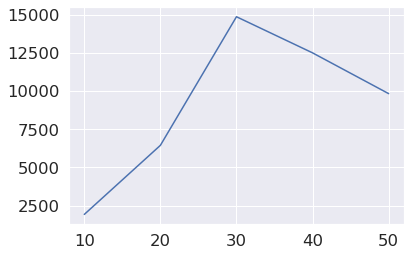

In [16]:
last_val_mean = [np.mean(val) for val in last_val]
plt.plot(np.arange(1,6,1) * 10, last_val_mean)
# plt.plot(last_val_mean)

## horizon exp on hopper and ant

In [13]:
env = ["ant", "hopper"]

all_file_list = glob.glob(os.path.join(os.getcwd(),'log/horizon_exp/*/*/*/logs.mat'))
print(len(all_file_list))

51


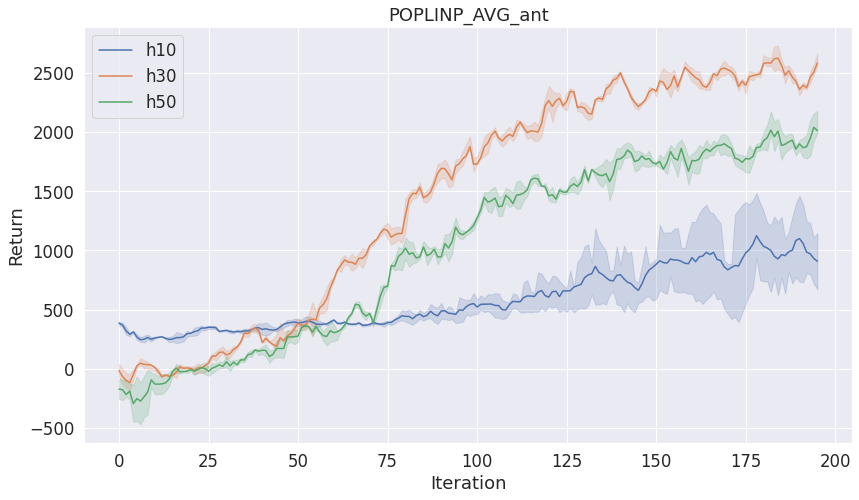

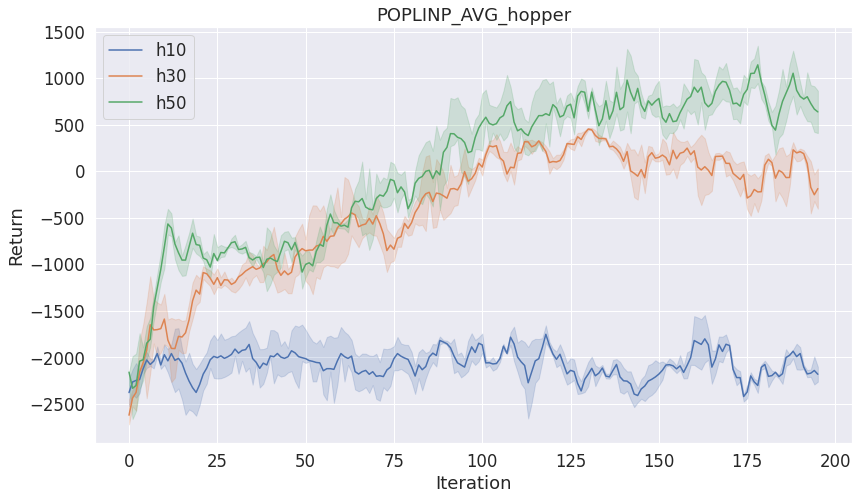

In [17]:
sns.set(style="darkgrid", font_scale=1.5)
horizon = ['h10', 'h30', 'h50']
last_val = []


for j in range(len(env)):
    fig = plt.figure(figsize=(12,7))
    for i in range(len(horizon)):
        file_list = [name for name in all_file_list if env[j] in name]
        file_list = [name for name in file_list if horizon[i] in name]
        # print(file_list)
        data = []
        for name in file_list:
            returns = loadmat(name)['returns']
            data.append(returns)
        data = np.concatenate(data,axis=0)
        ############################running average##########################
        data = pd.DataFrame(data)
        N = 5
        data = data.rolling(window=N, axis=1).mean().iloc[:,N-1:].values
        last_val.append(data[:, -1])
        data = pd.DataFrame(data)
        #####################################################################
        data = pd.DataFrame(data).melt()
        sns.lineplot(x="variable", y="value", data=data, label=horizon[i], ci=50)
    plt.title('POPLINP_AVG_' + env[j])
    plt.legend(loc='best')
    plt.tight_layout(pad=0.5)
    plt.xlabel("Iteration")
    plt.ylabel("Return")
    # plt.ylim(0, 14000)
    plt.show()

## Poplulation Size with horizon 30 on cheetah
different popsize on **cheetah** with 30 horizon



In [6]:
all_file_list = glob.glob(os.path.join(os.getcwd(),'log/popsize_exp_h30/POPLINP_AVG_Cheetah/*/*/logs.mat'))
# 5 horizon * 3 random seeds = 15 experiments
print(len(all_file_list))

12


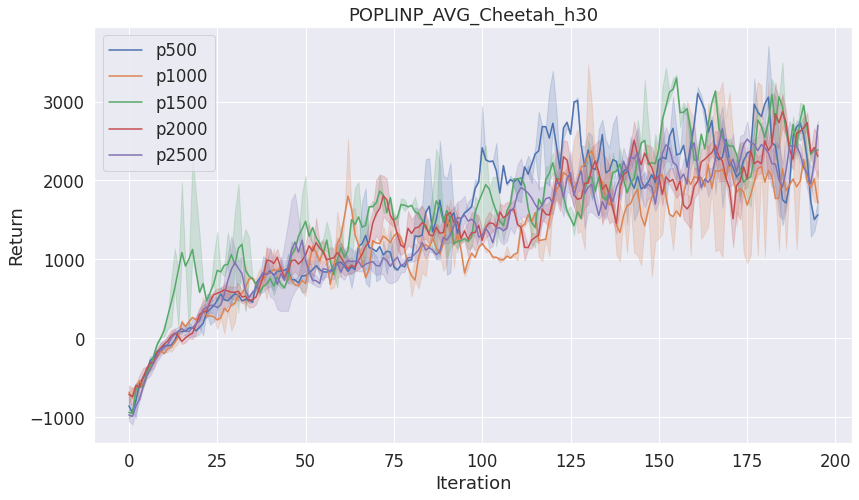

In [7]:
sns.set(style="darkgrid", font_scale=1.5)
horizon = ['p500', 'p1000', 'p1500','p2000', 'p2500']
last_val = []

fig = plt.figure(figsize=(12,7))
for i in range(len(horizon)):
    file_list = [name for name in all_file_list if horizon[i] in name]
    data = []
    for name in file_list:
        returns = loadmat(name)['returns']
        data.append(returns)
    data = np.concatenate(data,axis=0)
    ############################running average##########################
    data = pd.DataFrame(data)
    N = 5
    data = data.rolling(window=N, axis=1).mean().iloc[:,N-1:].values
    last_val.append(data[:, -1])
    data = pd.DataFrame(data)
    #####################################################################
    data = pd.DataFrame(data).melt()
    sns.lineplot(x="variable", y="value", data=data, label=horizon[i], ci=50)
plt.title('POPLINP_AVG_Cheetah_h30')
plt.legend(loc='best')
plt.tight_layout(pad=0.5)
plt.xlabel("Iteration")
plt.ylabel("Return")
# plt.ylim(0, 14000)
plt.show()

## plot spinnngup data
spinup not using savemat, direct saved as txt.


In [8]:
env = ["ant", "cheetah", "walker", 'hopper']
algo = ['td3', 'sac'] 

all_file_list = glob.glob(os.path.join(os.getcwd(),'data/*/*/progress.txt'))
print(len(all_file_list))

10


No handles with labels found to put in legend.


['/data/ShenShuo/workspace/POPLIN/data/td3_mbrlant/td3_mbrlant_s0/progress.txt']


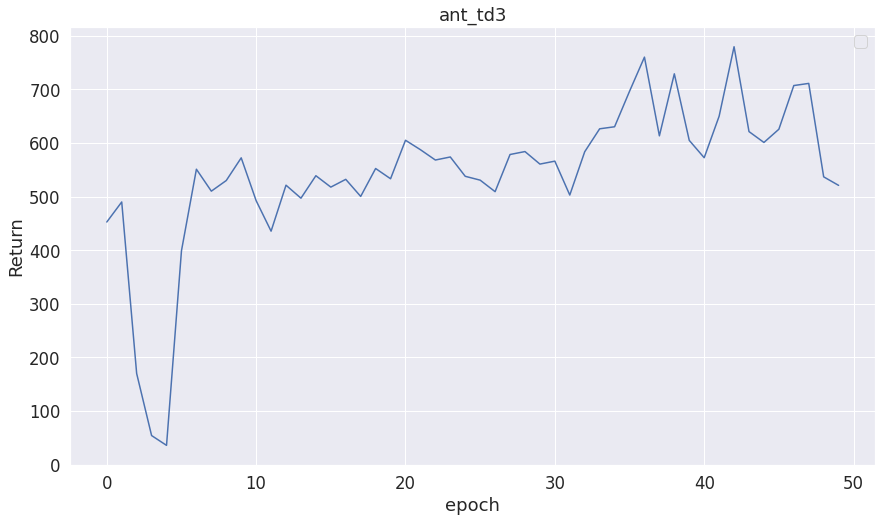

No handles with labels found to put in legend.


['/data/ShenShuo/workspace/POPLIN/data/sac_mbrlant/sac_mbrlant_s0/progress.txt']


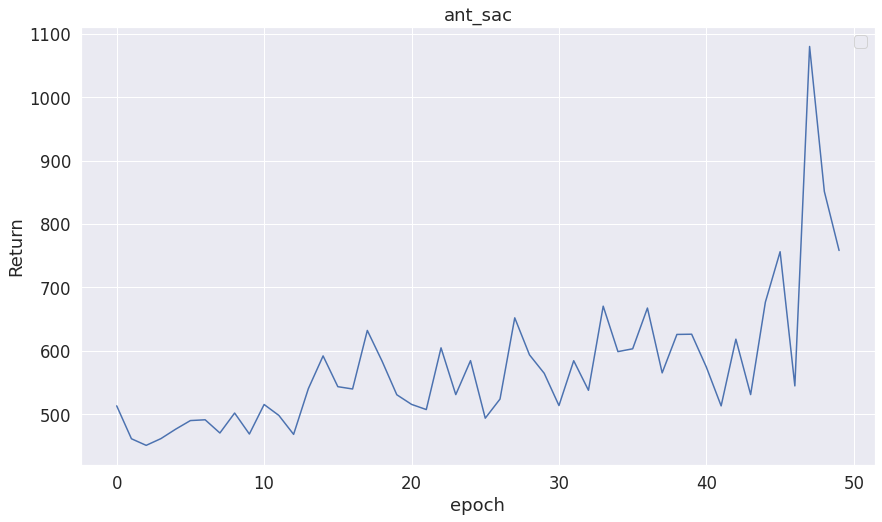

No handles with labels found to put in legend.


['/data/ShenShuo/workspace/POPLIN/data/td3_mbrlcheetah/td3_mbrlcheetah_s0/progress.txt']


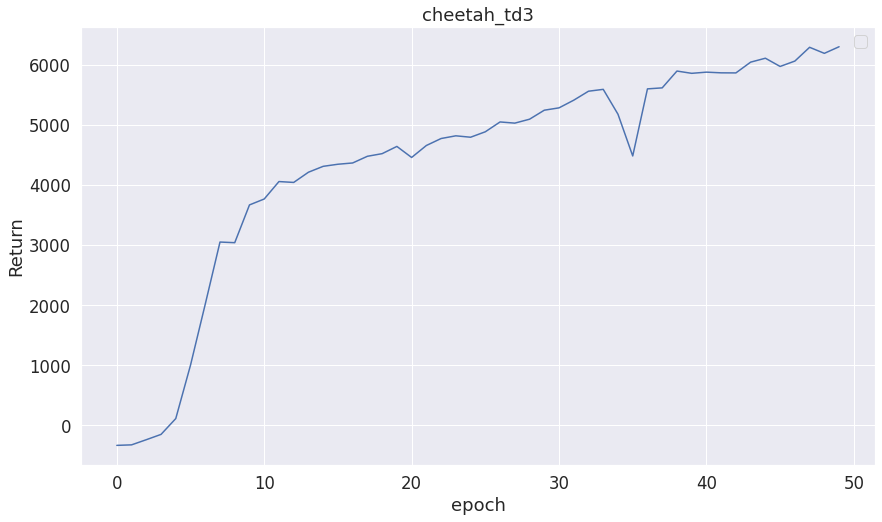

No handles with labels found to put in legend.


['/data/ShenShuo/workspace/POPLIN/data/sac_mbrlcheetah/sac_mbrlcheetah_s0/progress.txt']


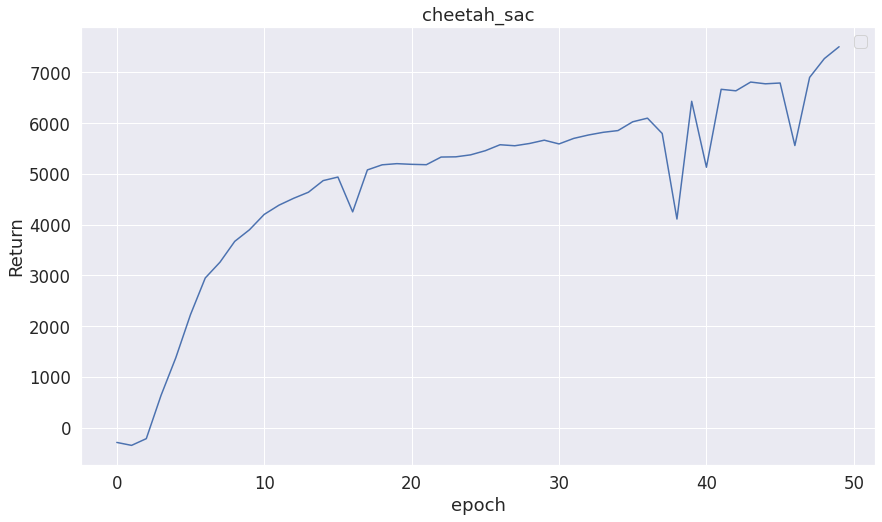

No handles with labels found to put in legend.


['/data/ShenShuo/workspace/POPLIN/data/td3_mbrlwalker/td3_mbrlwalker_s0/progress.txt']


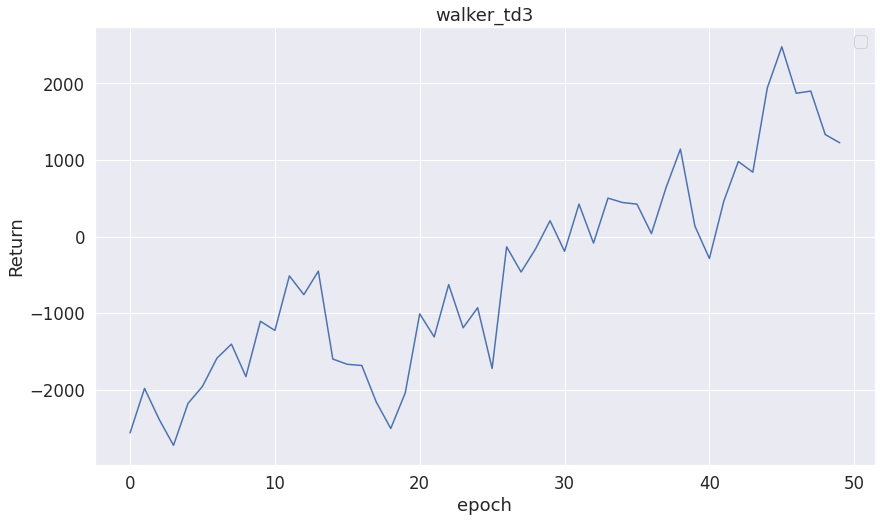

No handles with labels found to put in legend.


['/data/ShenShuo/workspace/POPLIN/data/sac_mbrlwalker/sac_mbrlwalker_s0/progress.txt']


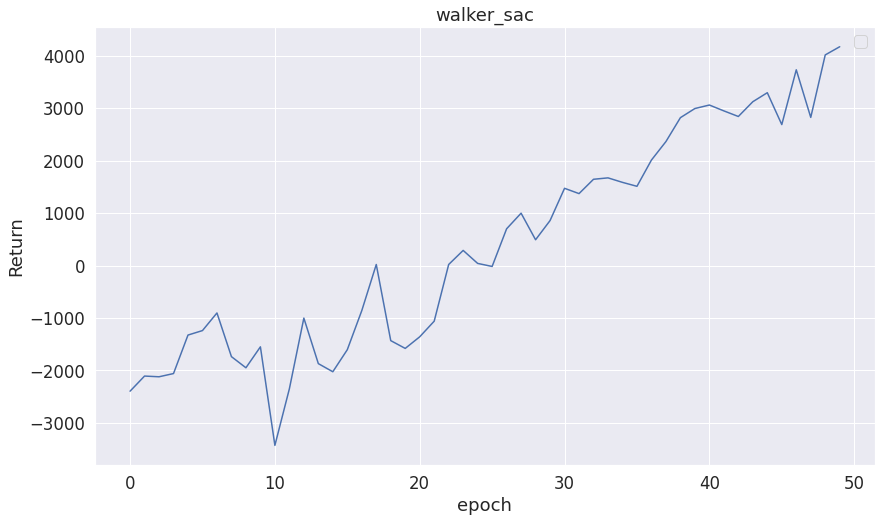

No handles with labels found to put in legend.


['/data/ShenShuo/workspace/POPLIN/data/td3_mbrlhopper/td3_mbrlhopper_s0/progress.txt']


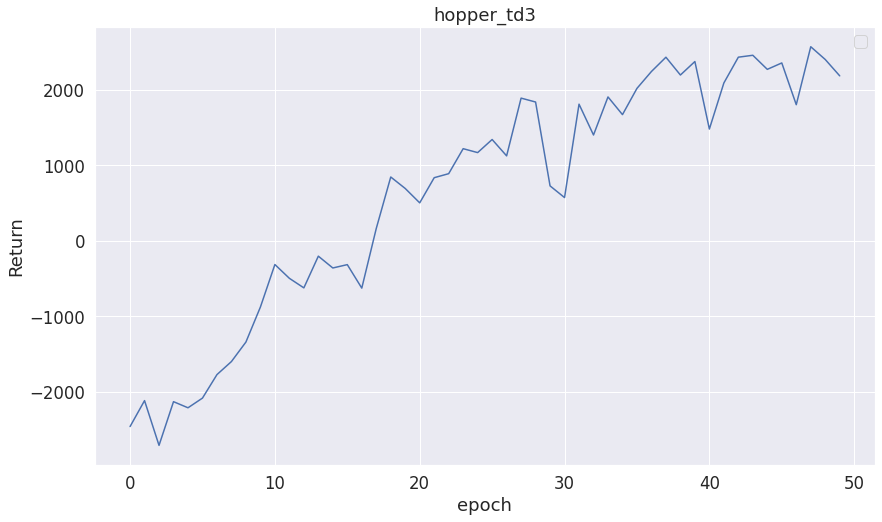

No handles with labels found to put in legend.


['/data/ShenShuo/workspace/POPLIN/data/sac_mbrlhopper/sac_mbrlhopper_s0/progress.txt']


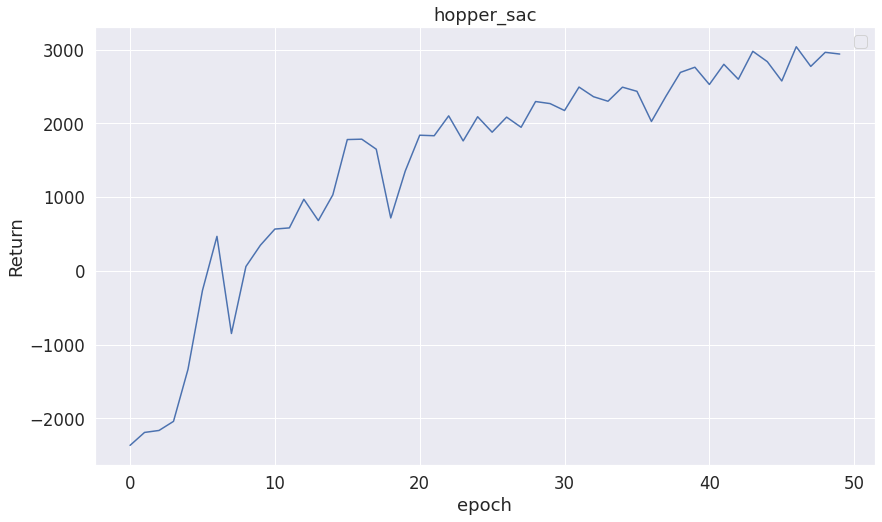

In [9]:
for j in range(len(env)):
    for i in range(len(algo)):
        fig = plt.figure(figsize=(12,7))
        file_list = [name for name in all_file_list if env[j] in name]
        file_list = [name for name in file_list if algo[i] in name]
        print(file_list)
        data = pd.read_table(file_list[0])

        # plt.plot(data)
        plt.plot(data['AverageEpRet'])
        plt.title(env[j] + "_" + algo[i])
        plt.legend(loc='best')
        plt.tight_layout(pad=0.5)
        plt.xlabel("epoch")
        plt.ylabel("Return")
        plt.show()

## plot policy exp


In [35]:
policy = ['h32', 'h64', 'h32_32']
plot_var = ['returns', 'test_returns']
file_path = 'log/policy_exp/POPLINP_AVG_Cheetah/*/*/logs.mat'

all_file_list = glob.glob(os.path.join(os.getcwd(),file_path))
print(len(all_file_list))

9


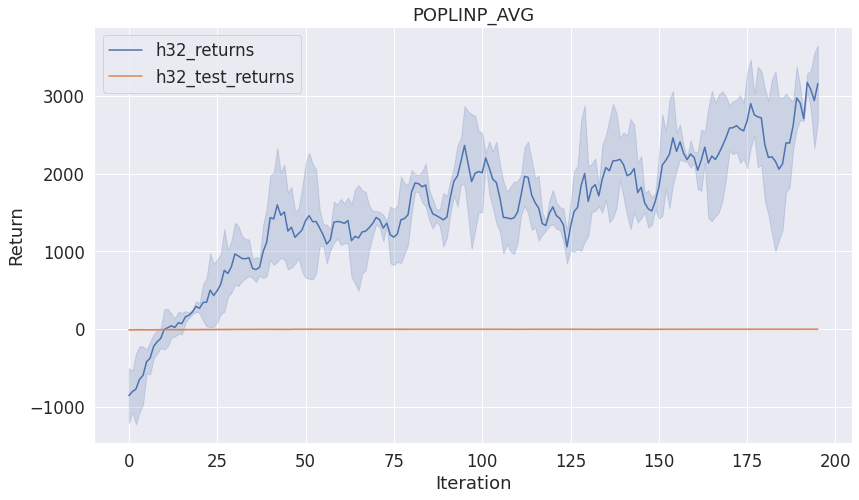

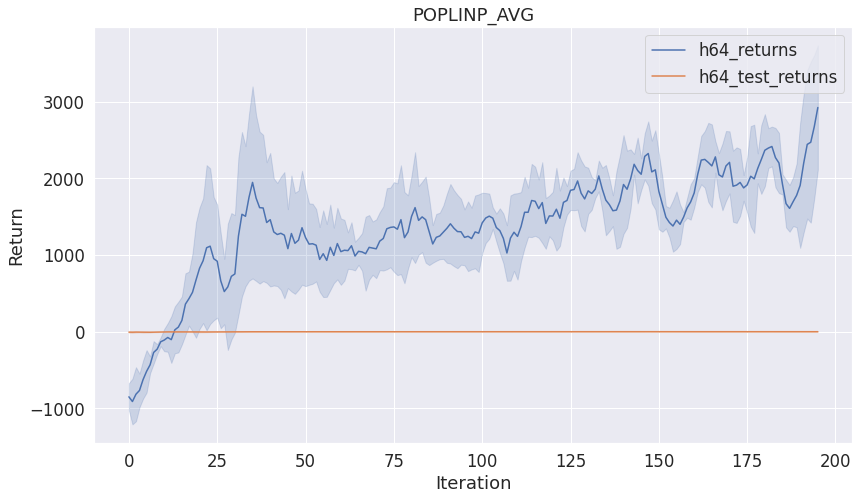

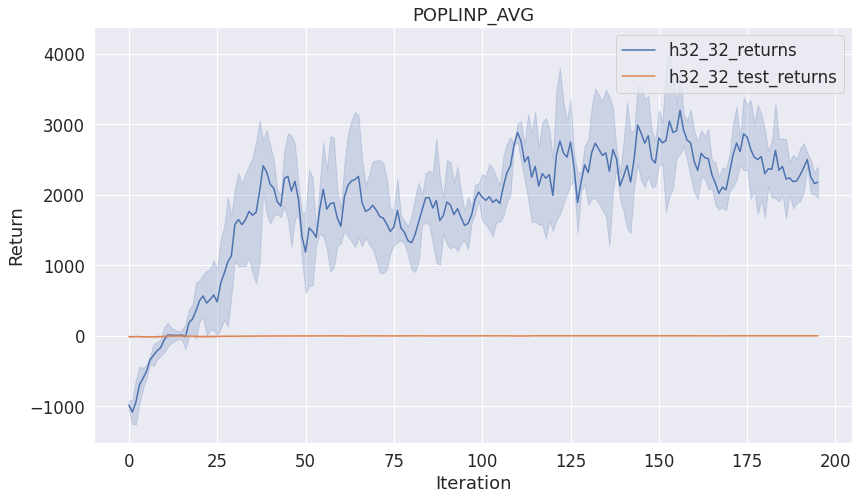

In [102]:
sns.set(style="darkgrid", font_scale=1.5)
last_val = []


for i in range(len(policy)):
    fig = plt.figure(figsize=(12,7))
    file_list = [name for name in all_file_list if policy[i] in name]
    if i == 0:
        file_list = [name for name in file_list if policy[2] not in name]
    for j in range(len(plot_var)):
        data = []
        for name in file_list:
            returns = loadmat(name)[plot_var[j]]
            data.append(returns)
        data = np.concatenate(data,axis=0)
        ###########################running average##########################
        data = pd.DataFrame(data)
        N = 5
        data = data.rolling(window=N, axis=1).mean().iloc[:,N-1:].values
        last_val.append(data[:, -1])
        data = pd.DataFrame(data)
        ####################################################################
        data = pd.DataFrame(data).melt()
        sns.lineplot(x="variable", y="value", data=data, label=policy[i]+'_'+plot_var[j], ci='sd')
    plt.title('POPLINP_AVG')
    plt.legend(loc='best')
    plt.tight_layout(pad=0.5)
    plt.xlabel("Iteration")
    plt.ylabel("Return")
    # plt.ylim(0, 14000)
    plt.show()

## check reward 

In [118]:
file = glob.glob(os.path.join(os.getcwd(),'log/policy_exp/POPLINP_AVG_Cheetah/h32/2021-01-13--16:52:08/logs.mat'))
file = file[0]
log = loadmat(file)

print(np.array(log['observations']).shape)
print(np.array(log['actions']).shape)
print(np.array(log['test_obs']).shape)
print(np.array(log['test_acs']).shape)
print(np.array(log['returns']).shape)
print(np.array(log['test_returns']).shape)

# gym_cheetah reward calculate
def obs_cost_fn(obs):
    return -obs[:, 8]  # the qvel for the root-x joint

def ac_cost_fn(acs):
    if isinstance(acs, np.ndarray):
        return 0.1 * np.sum(np.square(acs), axis=1)
    else:
        return 0.1 * tf.reduce_sum(tf.square(acs), axis=1)
    

log['observations'] = np.array(log['observations'])
log['actions'] = np.array(log['actions'])
log['test_obs'] = np.array(log['test_obs'])
log['test_acs'] = np.array(log['test_acs'])

# log 中 obs 和 ac的第一条轨迹是初始的随机动作生成的
# 没有计算return， 因此return 对应的下标在 ac 和 obs中应该加一
reward = 0
for i in range(1000):
    reward += (obs_cost_fn(log['observations'][1, i, :].reshape(1, -1)) 
              + ac_cost_fn(log['actions'][1, i, :].reshape(1, -1)))
print(reward[0], log['returns'][0, 0], (reward + log['returns'][0, 0])[0])

reward = [0] * 5
for j in range(5):
    for i in range(1000):
        reward[j] += (obs_cost_fn(log['test_obs'][j, i, :].reshape(1, -1)) 
                  + ac_cost_fn(log['test_acs'][j, i, :].reshape(1, -1)))
print(np.mean(reward), log['test_returns'][0, 0], log['test_returns'][0, 0] + np.mean(reward))

(201, 1001, 17)
(201, 1000, 6)
(1000, 1001, 17)
(1000, 1000, 6)
(1, 200)
(1, 200)
587.5378661219056 -587.537865395965 7.259405947479536e-07
0.018342026866053483 -0.018342026857030694 9.022789460022551e-12


In [104]:
file = glob.glob(os.path.join(os.getcwd(),'log/policy_exp/POPLINP_AVG_Cheetah/h32/2021-01-13--16:52:08/logs.mat'))
file = file[0]
log = loadmat(file)



(201, 1001, 17)
(1, 200)
(1, 200)
